# Lecture 3: Matplotlib

Matplotlib is the standard for making plots in python. And that's a mess. And the original help does not help at all. 

Indeed, the Matplotlib  plot structure is far from being trivial:
![Matplotlib](l3_structure.webp)

I mean, it is quite obvious that I hate it: why calling one thing "axis" and another "axes"? Let's take a deep breath and face it.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random

In [2]:
%matplotlib inline

## More details about the structure of the plot

[The original post from matplotlib website](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

**Figure**: The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes, but to be useful should have at least one.

In [3]:
fig = plt.figure()
fig.suptitle('No axes on this figure')

Text(0.5,0.98,'No axes on this figure')

<Figure size 432x288 with 0 Axes>

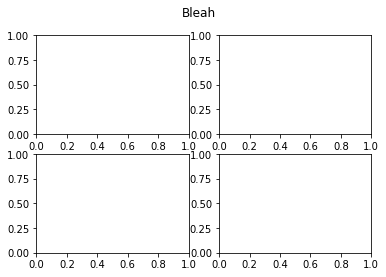

In [4]:
fig, ax_lst = plt.subplots(2, 2)
fig.suptitle('Bleah')
plt.show()

**Axes**: This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. In the previous plot, Axes are nothing but the four panels and are listed in *ax_lst*.

The Matplotlib crew knows how to make things clear: «The Axes contains two […] Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods)».

It just means that Axis are axis in the plot, while Axes are the image in which Axis are in.

Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

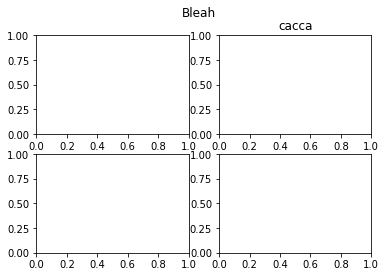

In [5]:
fig, ax_lst = plt.subplots(2, 2)
fig.suptitle('Bleah')
ax_lst[0,1].set_title('cacca')
plt.show()

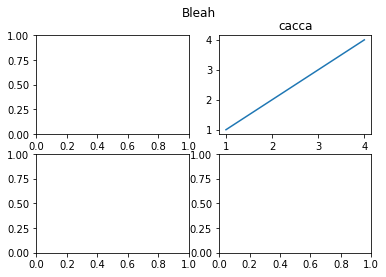

In [6]:
fig, ax_lst = plt.subplots(2, 2)
fig.suptitle('Bleah')
ax_lst[0,1].set_title('cacca')
ax_lst[0,1].plot([1, 2,3,4], [1, 2,3,4])
plt.show()

**Axis**: these are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).

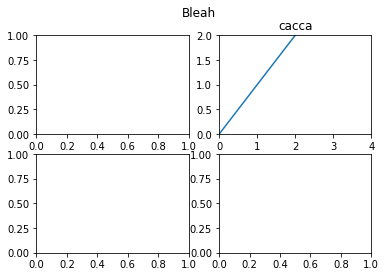

In [8]:
fig, ax_lst = plt.subplots(2, 2)
fig.suptitle('Bleah')
ax_lst[0,1].set_title('cacca')
ax_lst[0,1].plot([0, 1, 2,3,4], [0, 1, 2,3,4])
ax_lst[0,1].axis([0, 4, 0, 2])
plt.show()

**Artist**: basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects) (*so why calling it artist?*). Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Let us assume that it makes sense...

You should have noticed that we are using the submodule pyplot of matplotlib. [Here](https://matplotlib.org/tutorials/introductory/pyplot.html) you can find an introduction to its basic functions. Here we summarize some of them.

matplotlib.pyplot is a collection of command style functions: each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

### Basics

Before starting, **PAY ATTENTION!!** Instances for plot not always are the same for axis. For more details, take a look at [axes official reference](https://matplotlib.org/api/axes_api.html)<br/>
For instance the **plot** function we used before is from pyplot (for the moment let us forget about the axes).

In [7]:
import numpy as np

In [34]:
t = np.arange(0., 5., 0.2)

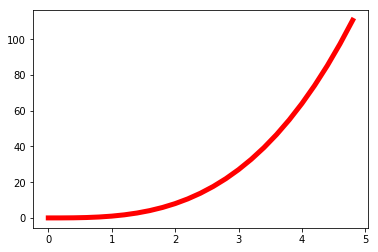

In [35]:
plt.plot(t, t**3, linewidth=5.0, color='red')
plt.show()

Otherwise you can modify the markers...

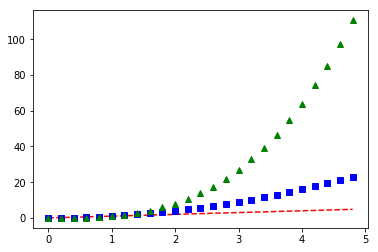

In [10]:
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

r--= red dashed
<br>bs= blue squares
<br>g^= green triangles

but it looks like **scatter**:

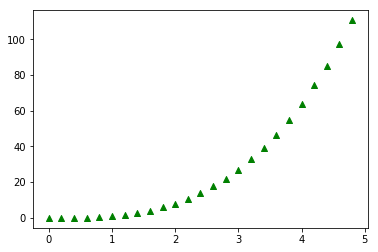

In [11]:
plt.scatter(t, t**3, marker='^', c='g')
plt.show()

(Do not ask me why two different function makes the same thing...)

**bar** instead is the first idea of an histogram.

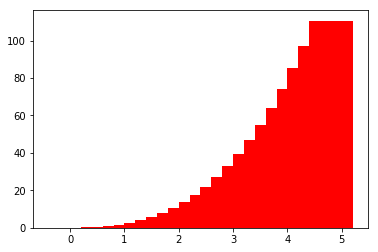

In [12]:
plt.bar(t, t**3, color='red')
plt.show()

**hist** instead makes exactly what an histogram is supposed to do

In [13]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

x are the entries, 50 is the number of bins, _density=1_ means that it is normalised to one (as a probability distribution)

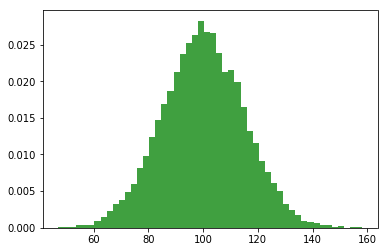

In [14]:
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)
plt.show()

### Making the plots more beautiful (maybe)

Adding the axes ticks, as well as zooming the plot and adding some random text.

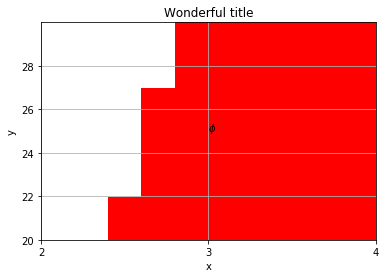

In [15]:
plt.bar(t, t**3, color='red')

plt.xlabel('x') # x-label
plt.ylabel('y') # y-label

plt.title('Wonderful title') #the title

plt.text(3, 25, r'$\phi$') # write something random somewhere

plt.grid(True) # add a grid (beware! when printed quite always makes the plot unreadable)

plt.xlim(2,4)
plt.ylim(20,30) # Limit for the plot. For some reasons, you may be interested in zooming on a specific area.

plt.xticks(np.linspace(2,4,3,endpoint=True))
plt.yticks(np.linspace(20,30,5,endpoint=False)) # selecting the ticks

plt.show()

Changing the **dimension of the fonts and the figures**. The ticks can be changed at pleasure.

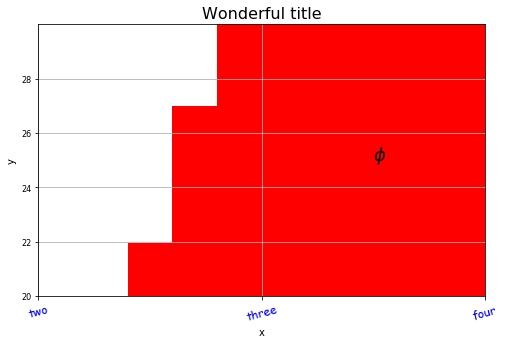

In [16]:
plt.figure(figsize=(8, 5)) # change the dimension of the figure
plt.bar(t, t**3, color='red')

plt.xlabel('x', size='10') # x-label
plt.ylabel('y', size='10') # y-label

plt.title('Wonderful title', size='16') #the title

plt.text(3.5, 25, r'$\phi$', size='18') # write something random somewhere

plt.grid(True) # add a grid (beware! when printed quite always makes the plot unreadable)

plt.xlim(2,4)
plt.ylim(20,30) # Limit for the plot. For some reasons, you may be interested in zooming on a specific area.

plt.xticks(np.linspace(2,4,3,endpoint=True), ['two', 'three', 'four'], size='12', family='fantasy', color='blue', rotation=15)
plt.yticks(np.linspace(20,30,5,endpoint=False), size='8') # selecting the ticks

plt.show()

**Legend**

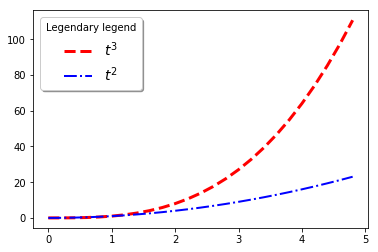

In [17]:
plt.plot(t, t**3, color="red",linewidth=3., linestyle="--", label=r"$t^3$")
plt.plot(t, t**2, color="blue", linewidth=2., linestyle="-.", label=r"$t^2$")
plt.legend(loc='upper left', title="Legendary legend", shadow=True, fontsize='14',fancybox=True)
plt.show()

Changing the scale

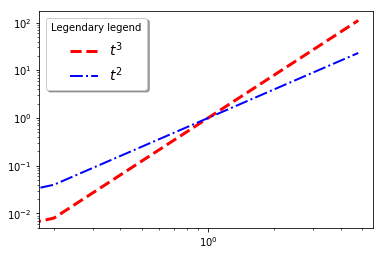

In [18]:
plt.plot(t, t**3, color="red",linewidth=3., linestyle="--", label=r"$t^3$")
plt.plot(t, t**2, color="blue", linewidth=2., linestyle="-.", label=r"$t^2$")
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper left', title="Legendary legend", shadow=True, fontsize='14',fancybox=True)
plt.show()

For some [odd reasons](https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend) changing the Legend title font size is far from being trivial

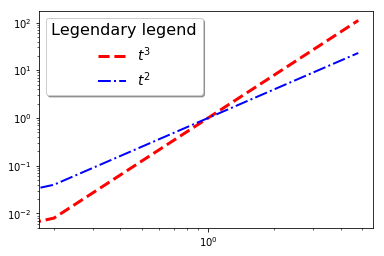

In [19]:
plt.plot(t, t**3, color="red",linewidth=3., linestyle="--", label=r"$t^3$")
plt.plot(t, t**2, color="blue", linewidth=2., linestyle="-.", label=r"$t^2$")
plt.yscale('log')
plt.xscale('log')
legend=plt.legend(loc='upper left', title="Legendary legend", shadow=True, fontsize='14',fancybox=True)
plt.setp(legend.get_title(),fontsize='16')
plt.show()

### Exercise: plot the $k^{nn}$ vs. $k$ for actors/actors network

##### Adjacency matrix

##### $k^\text{nn}$ distribution

### Exercise: plot the comparison between the real and the expected degree for CLACM for movies

#### Generate the sample

#### Plots

### Exercise: plot the comparison between the real and the expected $k^\text{ nn}$ for CLACM

### Exercise: putting all together in a single figure with more than a axis and save it to Desktop

### Exercise: plot the degree distribution of the actor-actor projection

**Histogram**

#### Log-binning

In [31]:
np.logspace(np.log10(0.1),np.log10(1140), 50)

array([1.00000000e-01, 1.20998062e-01, 1.46405309e-01, 1.77147587e-01,
       2.14345146e-01, 2.59353473e-01, 3.13812675e-01, 3.79707254e-01,
       4.59438418e-01, 5.55911581e-01, 6.72642238e-01, 8.13884071e-01,
       9.84783951e-01, 1.19156949e+00, 1.44177599e+00, 1.74452100e+00,
       2.11083660e+00, 2.55407137e+00, 3.09037686e+00, 3.73929610e+00,
       4.52447581e+00, 5.47452803e+00, 6.62407281e+00, 8.01499971e+00,
       9.69799429e+00, 1.17343851e+01, 1.41983786e+01, 1.71797629e+01,
       2.07871801e+01, 2.51520850e+01, 3.04335353e+01, 3.68239879e+01,
       4.45563116e+01, 5.39122734e+01, 6.52328059e+01, 7.89304307e+01,
       9.55042913e+01, 1.15558341e+02, 1.39823353e+02, 1.69183547e+02,
       2.04708813e+02, 2.47693696e+02, 2.99704572e+02, 3.62636723e+02,
       4.38783406e+02, 5.30919416e+02, 6.42402203e+02, 7.77294214e+02,
       9.40510933e+02, 1.13800000e+03])